In [20]:
# importing libraries and initial configs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import sys
import pickle
import os
os.chdir("your/path/here")

pd.set_option('display.max_columns', 100, 'display.max_rows', 100)

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [21]:
# Reading in dataset
df = pd.read_csv(
    "./data/OMG_OUR_LIFE_DEPENDS_ON_THIS.csv",
    na_values=["Missing", -999999999],
)


In [22]:
# dedicated to Deekshita
df.drop(columns='Unnamed: 0', inplace=True)
df.shape

(1516653, 76)

In [23]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
ML_data, val = train_test_split(train, test_size=0.2, random_state=8642)

# test.to_csv("C:\\Users\\deeks\\Documents\\MIDS\\IDS_705_Principles_of_Machine_Learning\\Final_Project\\Gitdata\\ML-2022-team-9\\data\\test.csv")
# val.to_csv("C:\\Users\\deeks\\Documents\\MIDS\\IDS_705_Principles_of_Machine_Learning\\Final_Project\\Gitdata\\ML-2022-team-9\\data\\val.csv")

In [24]:
for i in ML_data.columns:
    print(i, ML_data[i].dtype.name)

MachineIdentifier object
ProductName object
EngineVersion object
AppVersion object
AvSigVersion object
IsBeta int64
RtpStateBitfield float64
IsSxsPassiveMode int64
AVProductStatesIdentifier float64
AVProductsInstalled float64
AVProductsEnabled float64
HasTpm int64
CountryIdentifier int64
CityIdentifier float64
OrganizationIdentifier float64
GeoNameIdentifier float64
LocaleEnglishNameIdentifier int64
Platform object
Processor object
OsVer object
OsBuild int64
OsSuite int64
OsPlatformSubRelease object
OsBuildLab object
SkuEdition object
IsProtected float64
AutoSampleOptIn int64
SMode float64
IeVerIdentifier float64
SmartScreen object
Firewall float64
UacLuaenable float64
Census_MDC2FormFactor object
Census_DeviceFamily object
Census_OEMNameIdentifier float64
Census_OEMModelIdentifier float64
Census_ProcessorCoreCount float64
Census_ProcessorManufacturerIdentifier float64
Census_ProcessorModelIdentifier float64
Census_PrimaryDiskTotalCapacity float64
Census_PrimaryDiskTypeName object
Cens

In [25]:
cols_to_drop = [
    "IsBeta",
    "AutoSampleOptIn",
    "SMode",
    "Census_IsPortableOperatingSystem",
    "OrganizationIdentifier",
    "Census_InternalBatteryNumberOfCharges"
]


categorical_cols = [
    "IsSxsPassiveMode",
    "RtpStateBitfield",
    "AVProductStatesIdentifier",
    "AVProductsInstalled",
    "AVProductsEnabled",
    "HasTpm",  # think of dropping it
    "CountryIdentifier",
    "CityIdentifier",
    # "OrganizationIdentifier",
    "GeoNameIdentifier",
    "LocaleEnglishNameIdentifier",
    "Platform",
    "Processor",
    "OsVer",  # Think of dropping it
    "OsBuild",
    "OsSuite",
    "IsProtected",
    "IeVerIdentifier",
    "Firewall",
    "UacLuaenable",  # THINK of dropping
    "Census_OEMNameIdentifier",
    "Census_OEMModelIdentifier",
    "Census_ProcessorManufacturerIdentifier",
    "Census_ProcessorModelIdentifier",
    "Census_HasOpticalDiskDrive",
    "Census_PowerPlatformRoleName",
    "Census_OSVersion",
    "Census_OSArchitecture",
    "Census_OSBranch",  # OS version
    "Census_OSBuildNumber",  # OS version
    "Census_OSBuildRevision",  # OS version
    "Census_OSInstallLanguageIdentifier",  # think of dropping it
    "Census_OSUILocaleIdentifier",
    "Census_IsFlightsDisabled",
    "Census_FlightRing",
    "Census_FirmwareManufacturerIdentifier",
    "Census_FirmwareVersionIdentifier",
    "Census_IsSecureBootEnabled",
    "Census_IsVirtualDevice",
    "Census_IsTouchEnabled",
    "Census_IsPenCapable",
    "Census_IsAlwaysOnAlwaysConnectedCapable",
    "Wdft_IsGamer",
    "Wdft_RegionIdentifier",
    "HasDetections"
]


In [26]:
nulls_train = pd.DataFrame(
    {
        "Null Values": ML_data.isna().sum(),
        "Percentage Null Values": (ML_data.isna().sum() / len(ML_data)).apply(lambda x:"{:.2%}".format(x)),
    }
)
nulls_train.loc[nulls_train["Null Values"] > 0, :]


,Null Values,Percentage Null Values
RtpStateBitfield,3032,0.36%
AVProductStatesIdentifier,3469,0.41%
AVProductsInstalled,3469,0.41%
AVProductsEnabled,3469,0.41%
CityIdentifier,30946,3.64%
OrganizationIdentifier,262107,30.86%
GeoNameIdentifier,23,0.00%
IsProtected,3449,0.41%
SMode,51195,6.03%
IeVerIdentifier,5688,0.67%


In [27]:
nulls_cols = list(nulls_train.index)
nulls_cols

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_Inter

In [28]:
# Temporarily imputing to keep all nulls as a separate category, irr of orig col type
for col in nulls_cols:
    if ML_data[col].dtype.name in ["int64","float64"]:
        ML_data[col] = ML_data[col].fillna(-999999999)
    else:
        ML_data[col].fillna("Missing", inplace=True)

In [29]:
# Dropping some very skewed features, and >30% nulls (except SmartScreen)
ML_data.drop(columns = cols_to_drop,inplace=True)

# Correcting some numerical attributes to categorical
for col in categorical_cols:
    ML_data[col] = ML_data[col].astype("str")

In [30]:
# Rechecking nulls for the remaining numerical attributes
nulls_recheck = pd.DataFrame(
    {
        "Null Values": ML_data.isna().sum(),
        "Percentage Null Values": (ML_data.isna().sum() / len(ML_data)).apply(lambda x:"{:.2%}".format(x)),
    }
)
nulls_recheck.loc[nulls_recheck["Null Values"] > 0, :]


,Null Values,Percentage Null Values


In [31]:
# Imputing the float attributes with the median
for col in ML_data.columns:
    if ML_data[col].dtype.name in ["int64","float64"]:
        ML_data[col].replace(-999999999,ML_data[col].median(),inplace=True)

Checking for column: Census_ProcessorCoreCount


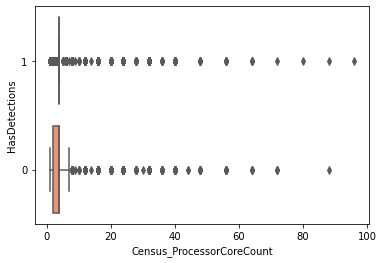

Checking for column: Census_PrimaryDiskTotalCapacity


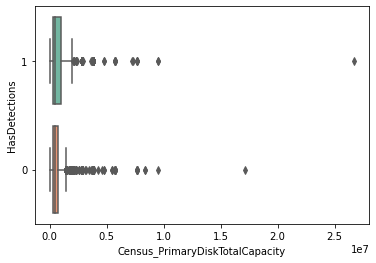

Checking for column: Census_SystemVolumeTotalCapacity


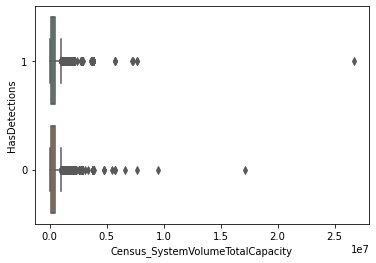

Checking for column: Census_TotalPhysicalRAM


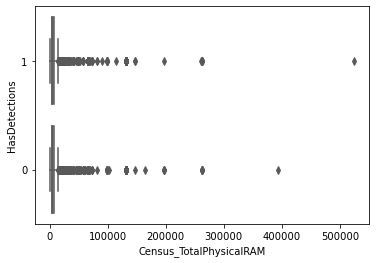

Checking for column: Census_InternalPrimaryDiagonalDisplaySizeInInches


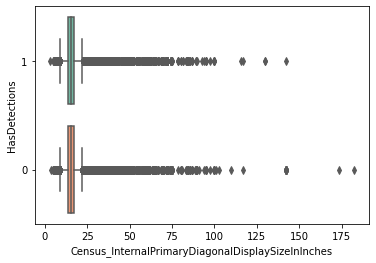

Checking for column: Census_InternalPrimaryDisplayResolutionHorizontal


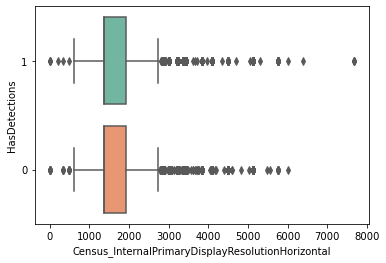

Checking for column: Census_InternalPrimaryDisplayResolutionVertical


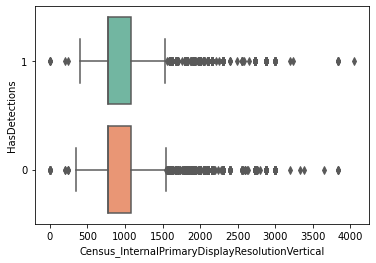

In [32]:
# Checking boxplots for numerical attributes
for col in ML_data.columns:
    if ML_data[col].dtype.name in ["int64","float64"]: 
        print("Checking for column: {}".format(col))
        sns.boxplot(x=col, y="HasDetections", data=ML_data, palette="Set2")
        plt.xlabel(col)
        plt.ylabel("HasDetections")
        plt.show();

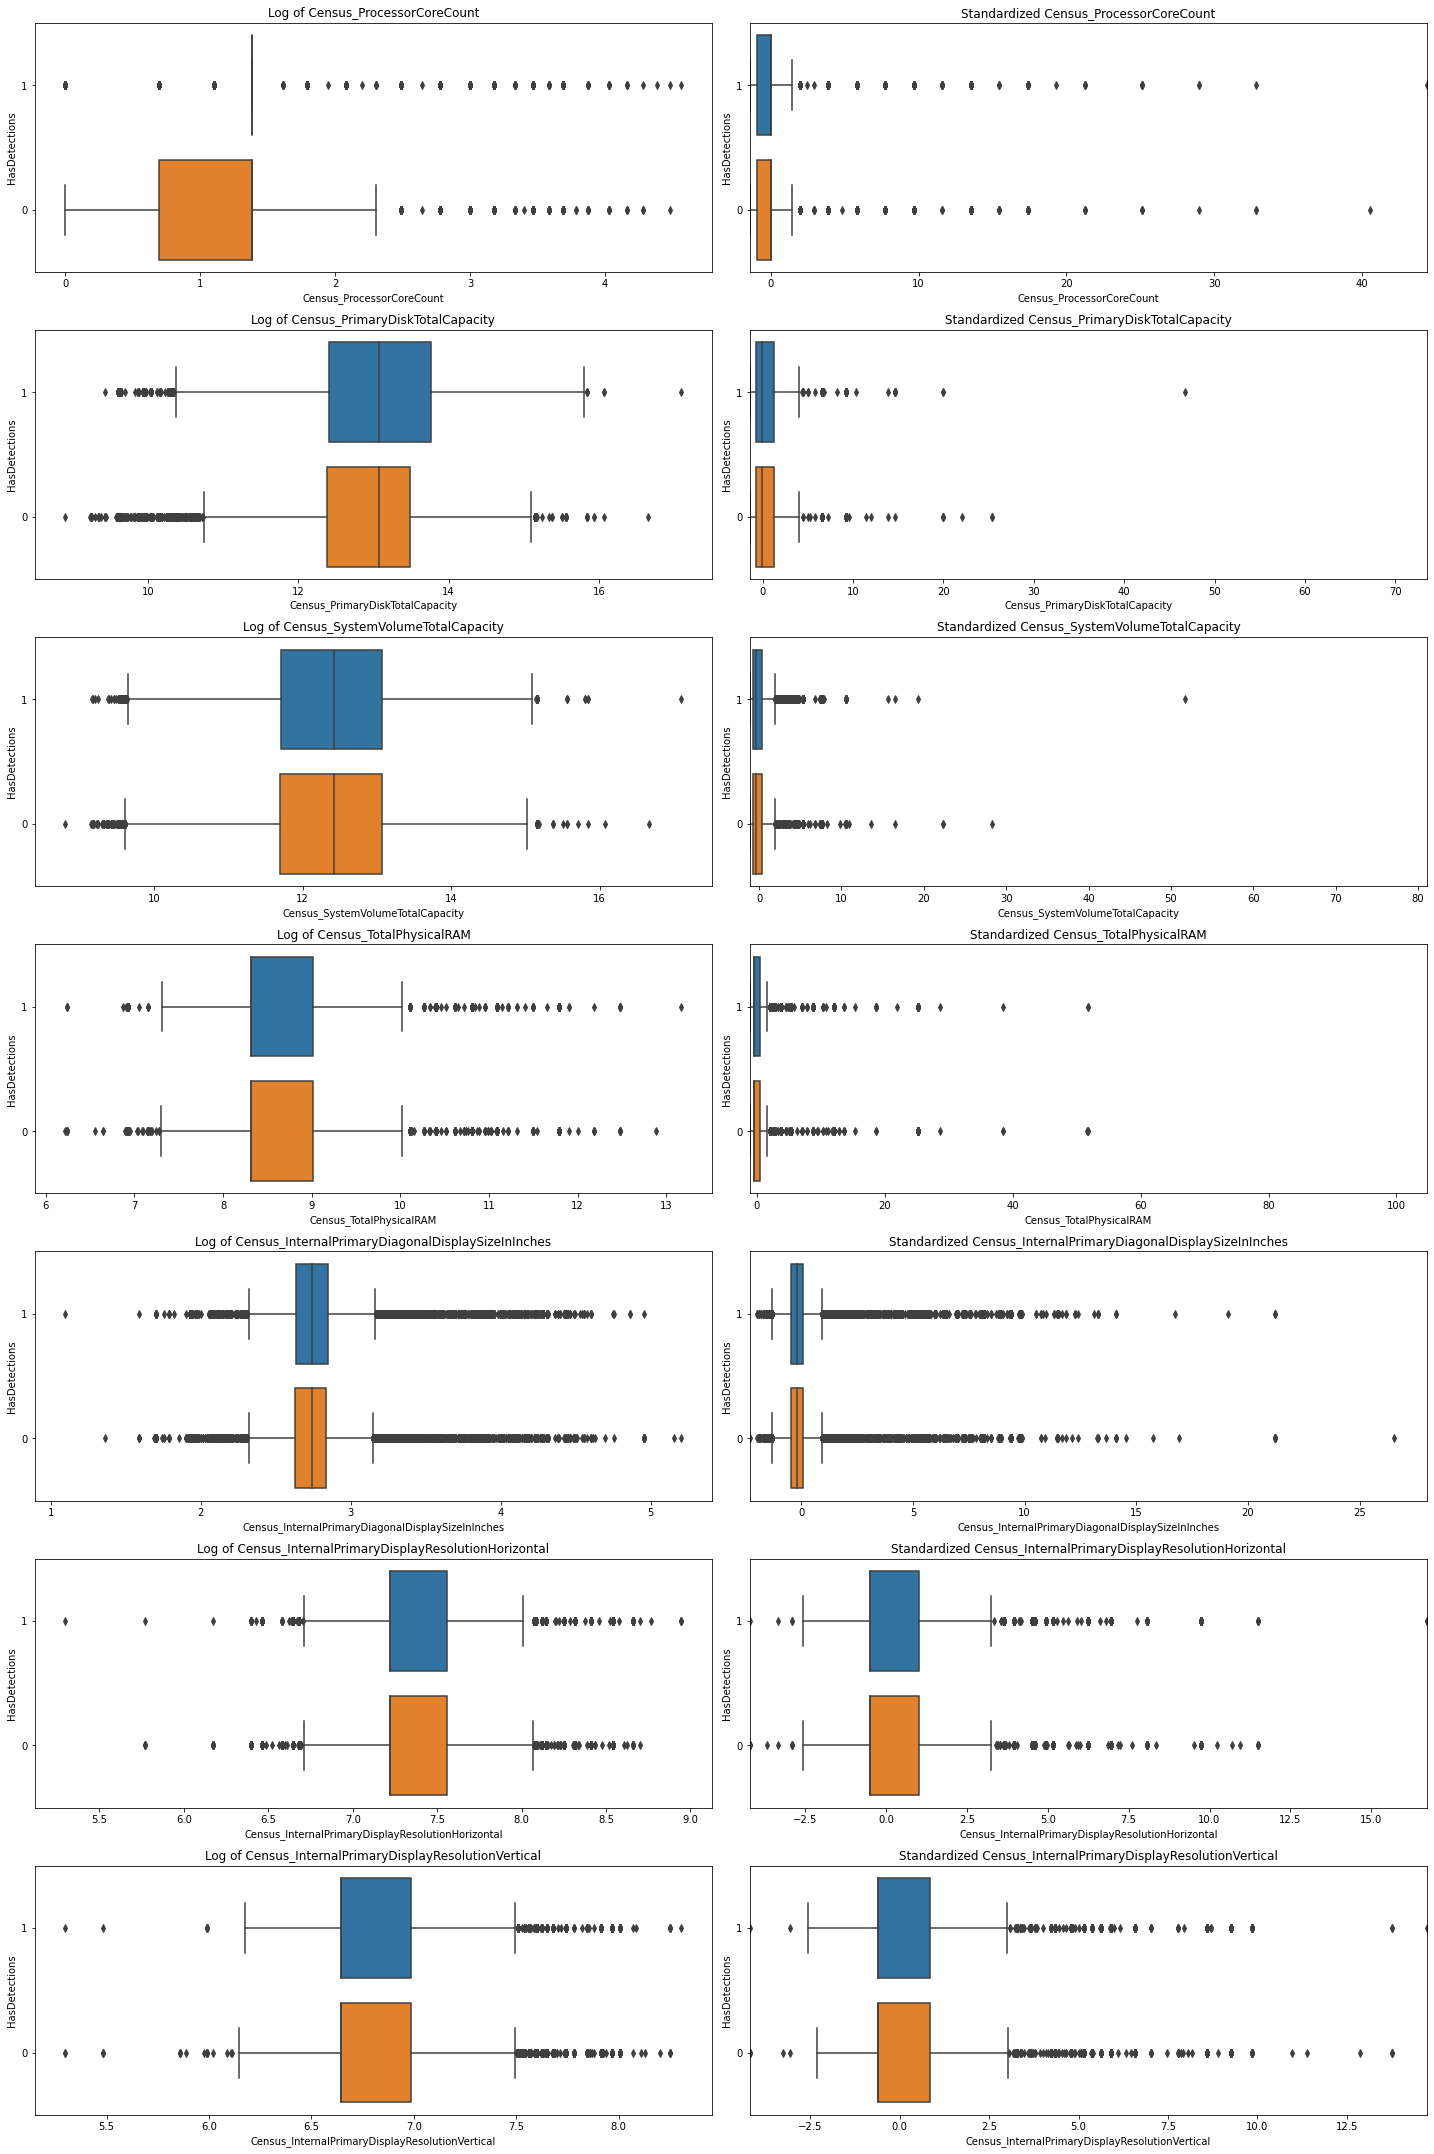

In [33]:
plt.subplots(7, 2, figsize=(20, 30))

num_cols = ML_data.select_dtypes(include=np.number).columns.tolist()
for col, sp in zip(num_cols, range(1, 15, 2)):

    x1 = pd.Series(np.log(ML_data[col]))
    s = StandardScaler()
    x2 = pd.Series(s.fit_transform(np.array(ML_data[col]).reshape(-1, 1)).flatten())
    y = ML_data["HasDetections"]
    plt.subplot(7, 2, sp)
    sns.boxplot(x1, y)
    plt.xlabel(col)
    plt.ylabel("HasDetections")
    plt.title("Log of {}".format(col))
    plt.subplot(7, 2, sp + 1)
    sns.boxplot(x2, y)
    plt.xlabel(col)
    plt.ylabel("HasDetections")
    plt.title("Standardized {}".format(col))
    plt.xlim([x2.min(), x2.max()])

plt.tight_layout(pad=1)


In [34]:
# ML_data.to_csv("C:\\Users\\deeks\\Downloads\\Imported_ML_Data.csv", index=False)
ML_data.to_pickle(".data/Imported_ML_Data_Cleaned.pkl")

In [35]:
# with open('Imported_ML_Data_Cleaned.pkl', 'wb') as f:
#     pickle.dump(ML_data, f)

In [36]:
# plt.subplots(7, 2, figsize=(20, 30))
# for col, sp in zip(num_cols, range(1,15,2)):
#     x1 = ML_data.loc[ML_data['HasDetections'] == '1', col]
#     x2 = ML_data.loc[ML_data['HasDetections'] == '0', col]

#     log_x1 = np.log(x1).replace(-np.inf, np.nan).dropna()
#     log_x2 = np.log(x2).replace(-np.inf, np.nan).dropna()
#     plt.subplot(7,2,sp)
#     plt.hist(x1, bins=int(180/1), alpha=0.5)
#     plt.hist(x2, bins=int(180/1), alpha=0.5)

#     plt.subplot(7,2,sp+1)
#     plt.hist(log_x1, bins=int(180/1), alpha=0.5)
#     plt.hist(log_x2, bins=int(180/1), alpha=0.5)

    

In [37]:
def num_feature_sel(p_value=0.05):
    sig_columns = []
    log_sig_columns = []
    for col in num_cols:
        x1 = ML_data.loc[ML_data['HasDetections'] == '1', col]
        x2 = ML_data.loc[ML_data['HasDetections'] == '0', col]

        log_x1 = np.log(x1).replace(-np.inf, np.nan)
        log_x2 = np.log(x2).replace(-np.inf, np.nan)

        if ttest_ind(x1,x2, equal_var=False, nan_policy='omit')[1] <= p_value:
            sig_columns.append(col)
        if ttest_ind(log_x1,log_x2, equal_var=False, nan_policy='omit')[1] <= p_value:
            log_sig_columns.append(col)

    return (sig_columns, log_sig_columns)

In [38]:
num_feature_sel()


(['Census_ProcessorCoreCount',
  'Census_PrimaryDiskTotalCapacity',
  'Census_SystemVolumeTotalCapacity',
  'Census_TotalPhysicalRAM',
  'Census_InternalPrimaryDiagonalDisplaySizeInInches',
  'Census_InternalPrimaryDisplayResolutionHorizontal',
  'Census_InternalPrimaryDisplayResolutionVertical'],
 ['Census_ProcessorCoreCount',
  'Census_PrimaryDiskTotalCapacity',
  'Census_SystemVolumeTotalCapacity',
  'Census_TotalPhysicalRAM',
  'Census_InternalPrimaryDiagonalDisplaySizeInInches',
  'Census_InternalPrimaryDisplayResolutionHorizontal',
  'Census_InternalPrimaryDisplayResolutionVertical'])